## Demo code for Mercer kernels

Mercer kernels always evaluate to positive definite matrices. Let's see which of 
the kernels we used for smoothing are actually Mercer kernels.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def boxcar(u, h):
    return 0.5*np.array(np.fabs(u)/h < 1)

def triangular(u, h):
    return (1-np.abs(u)/h)*np.array(np.fabs(u)/h < 1)

def gaussian(u, h):
    return np.exp(-(u)**2/(2*h**2))

def epanechnikov(u, h):
    return 0.75 * (1 - u**2/h**2)*np.array(np.fabs(u)/h < 1)

def tricube(u, h):
    return (78./80) * ((1 - np.abs(u)**3/h**3)**3)*np.array(np.fabs(u)/h < 1)

def compute_gram_matrix(X, kernel):
    n = len(X)
    K = np.zeros(n*n).reshape(n, n)
    for j in np.arange(n):
        K[:,j] = kernel(X - X[j], 1)
    return K

def plot_eigenvalues(kernel, n=20):
    fix, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
    u = np.linspace(-3, 3, 100)
    ax1.plot(u, kernel(u, 1), color='gray')
    X = np.random.randn(n)
    K = compute_gram_matrix(X, kernel)
    eigs = np.sort(np.real(np.linalg.eig(K)[0]))
    ax2.bar(np.arange(n), height=np.where(eigs >= 0, eigs, 0), color='red')
    ax2.bar(np.arange(n), height=np.where(eigs < 0, eigs, 0), color='blue')
    ax2.axhline(0, color='gray', linewidth=.5)
    _ = ax2.set_xticks([])
    

We compute the "Gram matrix" by evaluating the kernel on all pairs of points. 
Then, we compute the eigenvalues of the resulting matrix. If some of the 
eigenvalues are negative, the kernel cannot be a Mercer kernel.


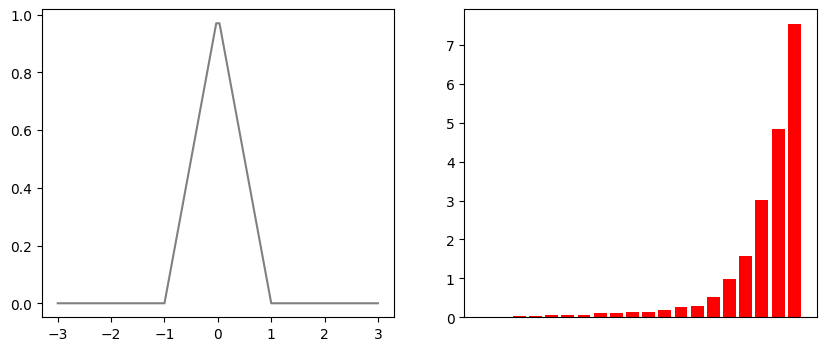

In [6]:
plot_eigenvalues(triangular, 20)
